In [27]:
import os

path = os.listdir('brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers import Input

In [29]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (256,256))
        X.append(img)
        Y.append(classes[cls])

In [30]:
X = np.array(X)
Y = np.array(Y)

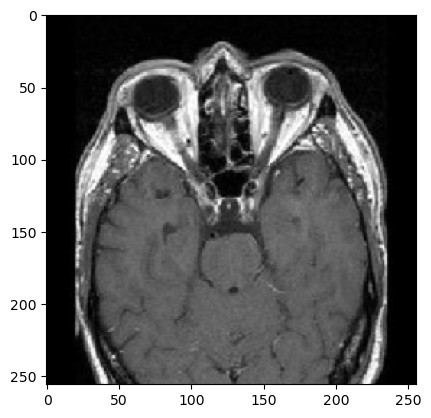

In [31]:
plt.imshow(X[0], cmap='gray')

In [32]:
X[0].shape

(256, 256)

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=10,
                                               test_size=.20)

In [34]:
xtrain.shape, xtest.shape

((977, 256, 256), (245, 256, 256))

In [35]:
#Model building starts
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input,Bidirectional,LSTM,Lambda, GRU
from tensorflow.keras.layers import Permute,GlobalMaxPool1D,Concatenate, Dense, BatchNormalization, Dropout, GlobalAveragePooling1D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Activation, Flatten,MaxPooling1D,Conv1D, Conv2D,MaxPool2D

In [36]:
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape = (256, 256)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Bidirectional(GRU(64, return_sequences=True)))

model.add(Conv1D(64, 3, activation='relu'))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Bidirectional(GRU(128, return_sequences=True)))

model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='softmax'))

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 254, 64)           49216     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 127, 64)          0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 127, 64)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 127, 128)         49920     
 nal)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 125, 64)           24640     
                                                                 
 conv1d_6 (Conv1D)           (None, 123, 64)          

In [37]:
model.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])

In [60]:
r = model.fit(xtrain, ytrain, epochs=50,validation_data=(xtest,ytest), batch_size=32)

Epoch 1/50
31/31 [==============================] - 5s 155ms/step - loss: 0.0300 - accuracy: 0.9898 - val_loss: 0.1579 - val_accuracy: 0.9673
Epoch 2/50
31/31 [==============================] - 5s 150ms/step - loss: 0.0929 - accuracy: 0.9672 - val_loss: 0.2571 - val_accuracy: 0.9224
Epoch 3/50
31/31 [==============================] - 5s 162ms/step - loss: 0.1065 - accuracy: 0.9662 - val_loss: 0.1899 - val_accuracy: 0.9388
Epoch 4/50
31/31 [==============================] - 6s 185ms/step - loss: 0.0923 - accuracy: 0.9703 - val_loss: 0.3989 - val_accuracy: 0.9020
Epoch 5/50
31/31 [==============================] - 6s 191ms/step - loss: 0.0532 - accuracy: 0.9806 - val_loss: 0.2391 - val_accuracy: 0.9592
Epoch 6/50
31/31 [==============================] - 6s 183ms/step - loss: 0.0568 - accuracy: 0.9826 - val_loss: 0.4181 - val_accuracy: 0.9388
Epoch 7/50
31/31 [==============================] - 6s 184ms/step - loss: 0.0632 - accuracy: 0.9816 - val_loss: 0.2222 - val_accuracy: 0.9551
Epoch 

In [39]:
pred = model.predict(xtest)

8/8 [==============================] - 2s 41ms/step


In [40]:
# misclassified=np.where(ytest!=pred)
# misclassified

In [41]:
# print("Total Misclassified Samples: ",len(misclassified[0]))
# print(pred[36],ytest[36])

In [42]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

In [43]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (256,256))
        X.append(img)
        Y.append(classes[cls])

1/1 [==============================] - 0s 33ms/step


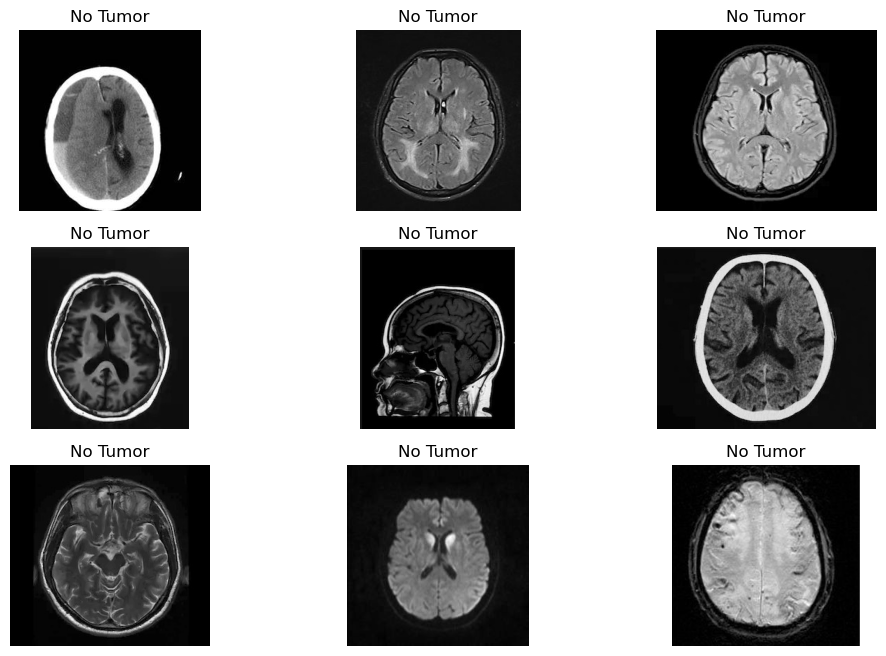

In [44]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (256,256))
    img1 = img1.reshape(1, 256, 256)
    p = model.predict(img1)
#     print(p)
    if p[0][0]>=.5:
        plt.title(dec[0])
    else:
        plt.title(dec[1])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

1/1 [==============================] - 0s 36ms/step
0.0049412264
1/1 [==============================] - 0s 30ms/step
0.49544778
1/1 [==============================] - 0s 28ms/step
0.93270355
1/1 [==============================] - 0s 28ms/step
0.74917626
1/1 [==============================] - 0s 28ms/step
0.10770197
1/1 [==============================] - 0s 26ms/step
0.9873685
1/1 [==============================] - 0s 28ms/step
0.13852744
1/1 [==============================] - 0s 28ms/step
0.0049412264
1/1 [==============================] - 0s 29ms/step
0.13852744
1/1 [==============================] - 0s 29ms/step
0.13852744
1/1 [==============================] - 0s 34ms/step
0.06941686
1/1 [==============================] - 0s 30ms/step
0.06941686
1/1 [==============================] - 0s 28ms/step
0.0082711205
1/1 [==============================] - 0s 29ms/step
0.0082711205
1/1 [==============================] - 0s 29ms/step
0.0049412264
1/1 [==============================] - 0s 28ms

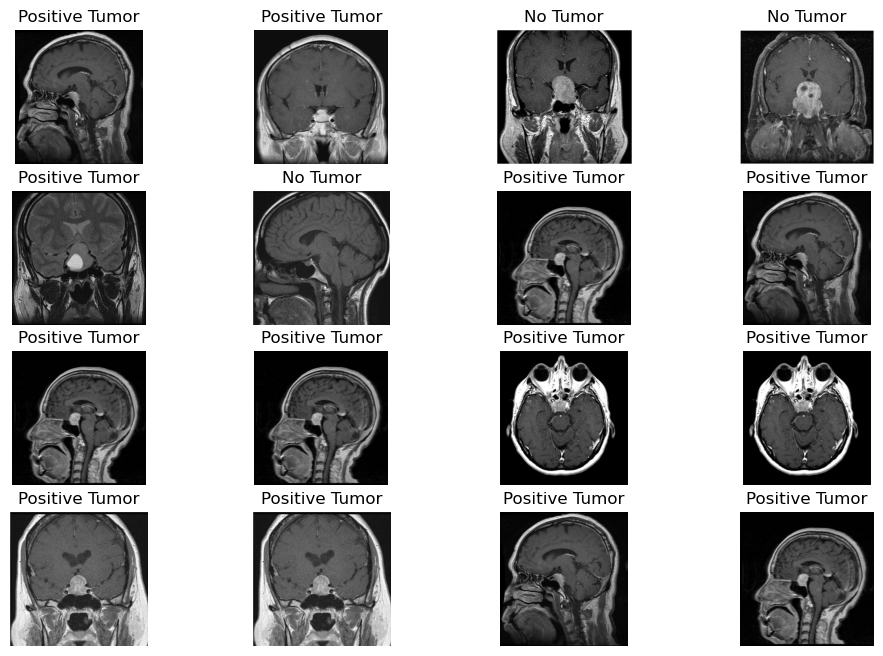

In [45]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (256,256))
    img1 = img1.reshape(1, 256, 256)
    p = model.predict(img1)
#     print(p)
    print(p[0][0])
    if p[0][0]>=.5:
        plt.title(dec[0])
    else:
        plt.title(dec[1])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1
    

In [46]:
pred_y = np.argmax(pred, axis=1)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,precision_score, f1_score, recall_score,accuracy_score
print("Bidirectional-GRU Model Metrics")
print('Accuracy: ', accuracy_score(ytest, pred_y))
print('Precision: ', precision_score(ytest, pred_y))
print('F1 Score: ', f1_score(ytest, pred_y))
print('Recall Score: ', recall_score(ytest, pred_y))
print('Roc Auc Score: ', roc_auc_score(ytest, pred_y))

Bidirectional-GRU Model Metrics
Accuracy:  0.9469387755102041
Precision:  0.9748427672955975
F1 Score:  0.9597523219814241
Recall Score:  0.9451219512195121
Roc Auc Score:  0.9478696175850647


In [48]:
import pickle
# save the model to disk
filename = 'CNN_GRU.sav'
pickle.dump(model, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\bidirectional
......vars
...layers\bidirectional\backward_layer
......vars
...layers\bidirectional\backward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional\forward_layer
......vars
...layers\bidirectional\forward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional\layer
......vars
...layers\bidirectional\layer\cell
......vars
...layers\bidirectional_1
......vars
...layers\bidirectional_1\backward_layer
......vars
...layers\bidirectional_1\backward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional_1\forward_layer
......vars
...layers\bidirectional_1\forward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional_1\layer
......vars
...layers\bidirectional_1\layer\cell
......vars
...layers\conv1d
......vars
.........0
.........1
...layers\conv1d_1
......vars
.........0
.........1
...layers\conv1d_2
......v

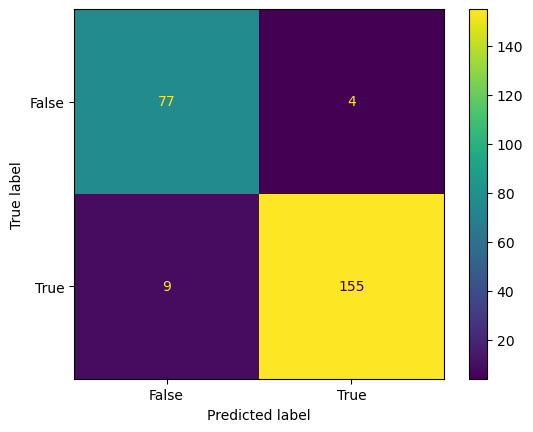

In [49]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(ytest, pred_y)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

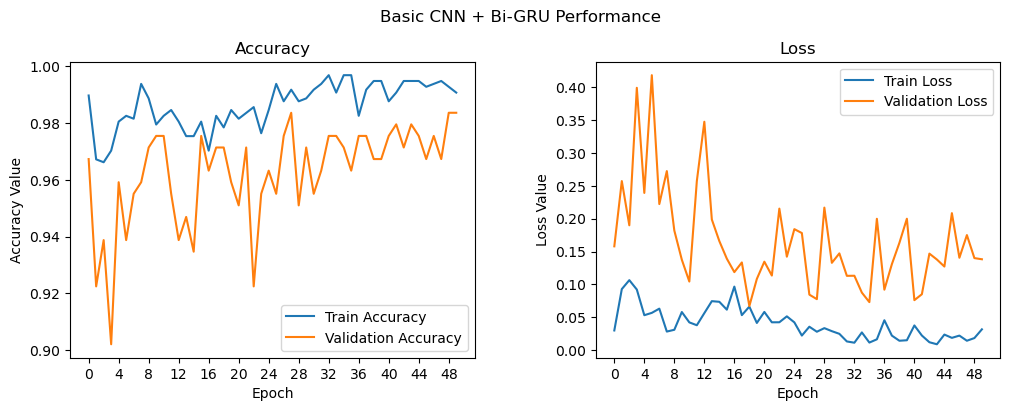

In [66]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN + Bi-GRU Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,50))
ax1.plot(epoch_list, r.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, r.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 50, 4))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, r.history['loss'], label='Train Loss')
ax2.plot(epoch_list, r.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 50, 4))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

plt.savefig('CNN + Bi-GRU Performance.png')